Importing Modules

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [17]:
train_file_path = 'train.csv'
data = pd.read_csv(train_file_path)

Exploratory Data Analysis (EDA)


In [18]:
data.head()
data.describe()
data.info()

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204277 entries, 0 to 204276
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          204277 non-null  object 
 1   Age             204277 non-null  int64  
 2   Income          204277 non-null  int64  
 3   LoanAmount      204277 non-null  int64  
 4   CreditScore     204277 non-null  int64  
 5   MonthsEmployed  204277 non-null  int64  
 6   NumCreditLines  204277 non-null  int64  
 7   InterestRate    204277 non-null  float64
 8   LoanTerm        204277 non-null  int64  
 9   DTIRatio        204277 non-null  float64
 10  Education       204277 non-null  object 
 11  EmploymentType  204277 non-null  object 
 12  MaritalStatus   204277 non-null  object 
 13  HasMortgage     204277 non-null  object 
 14  HasDependents   204277 non-null  object 
 15  LoanPurpose     204277 non-null  object 
 16  HasCoSigner     204277 non-null  object 
 17  Default   

Check for Outliers

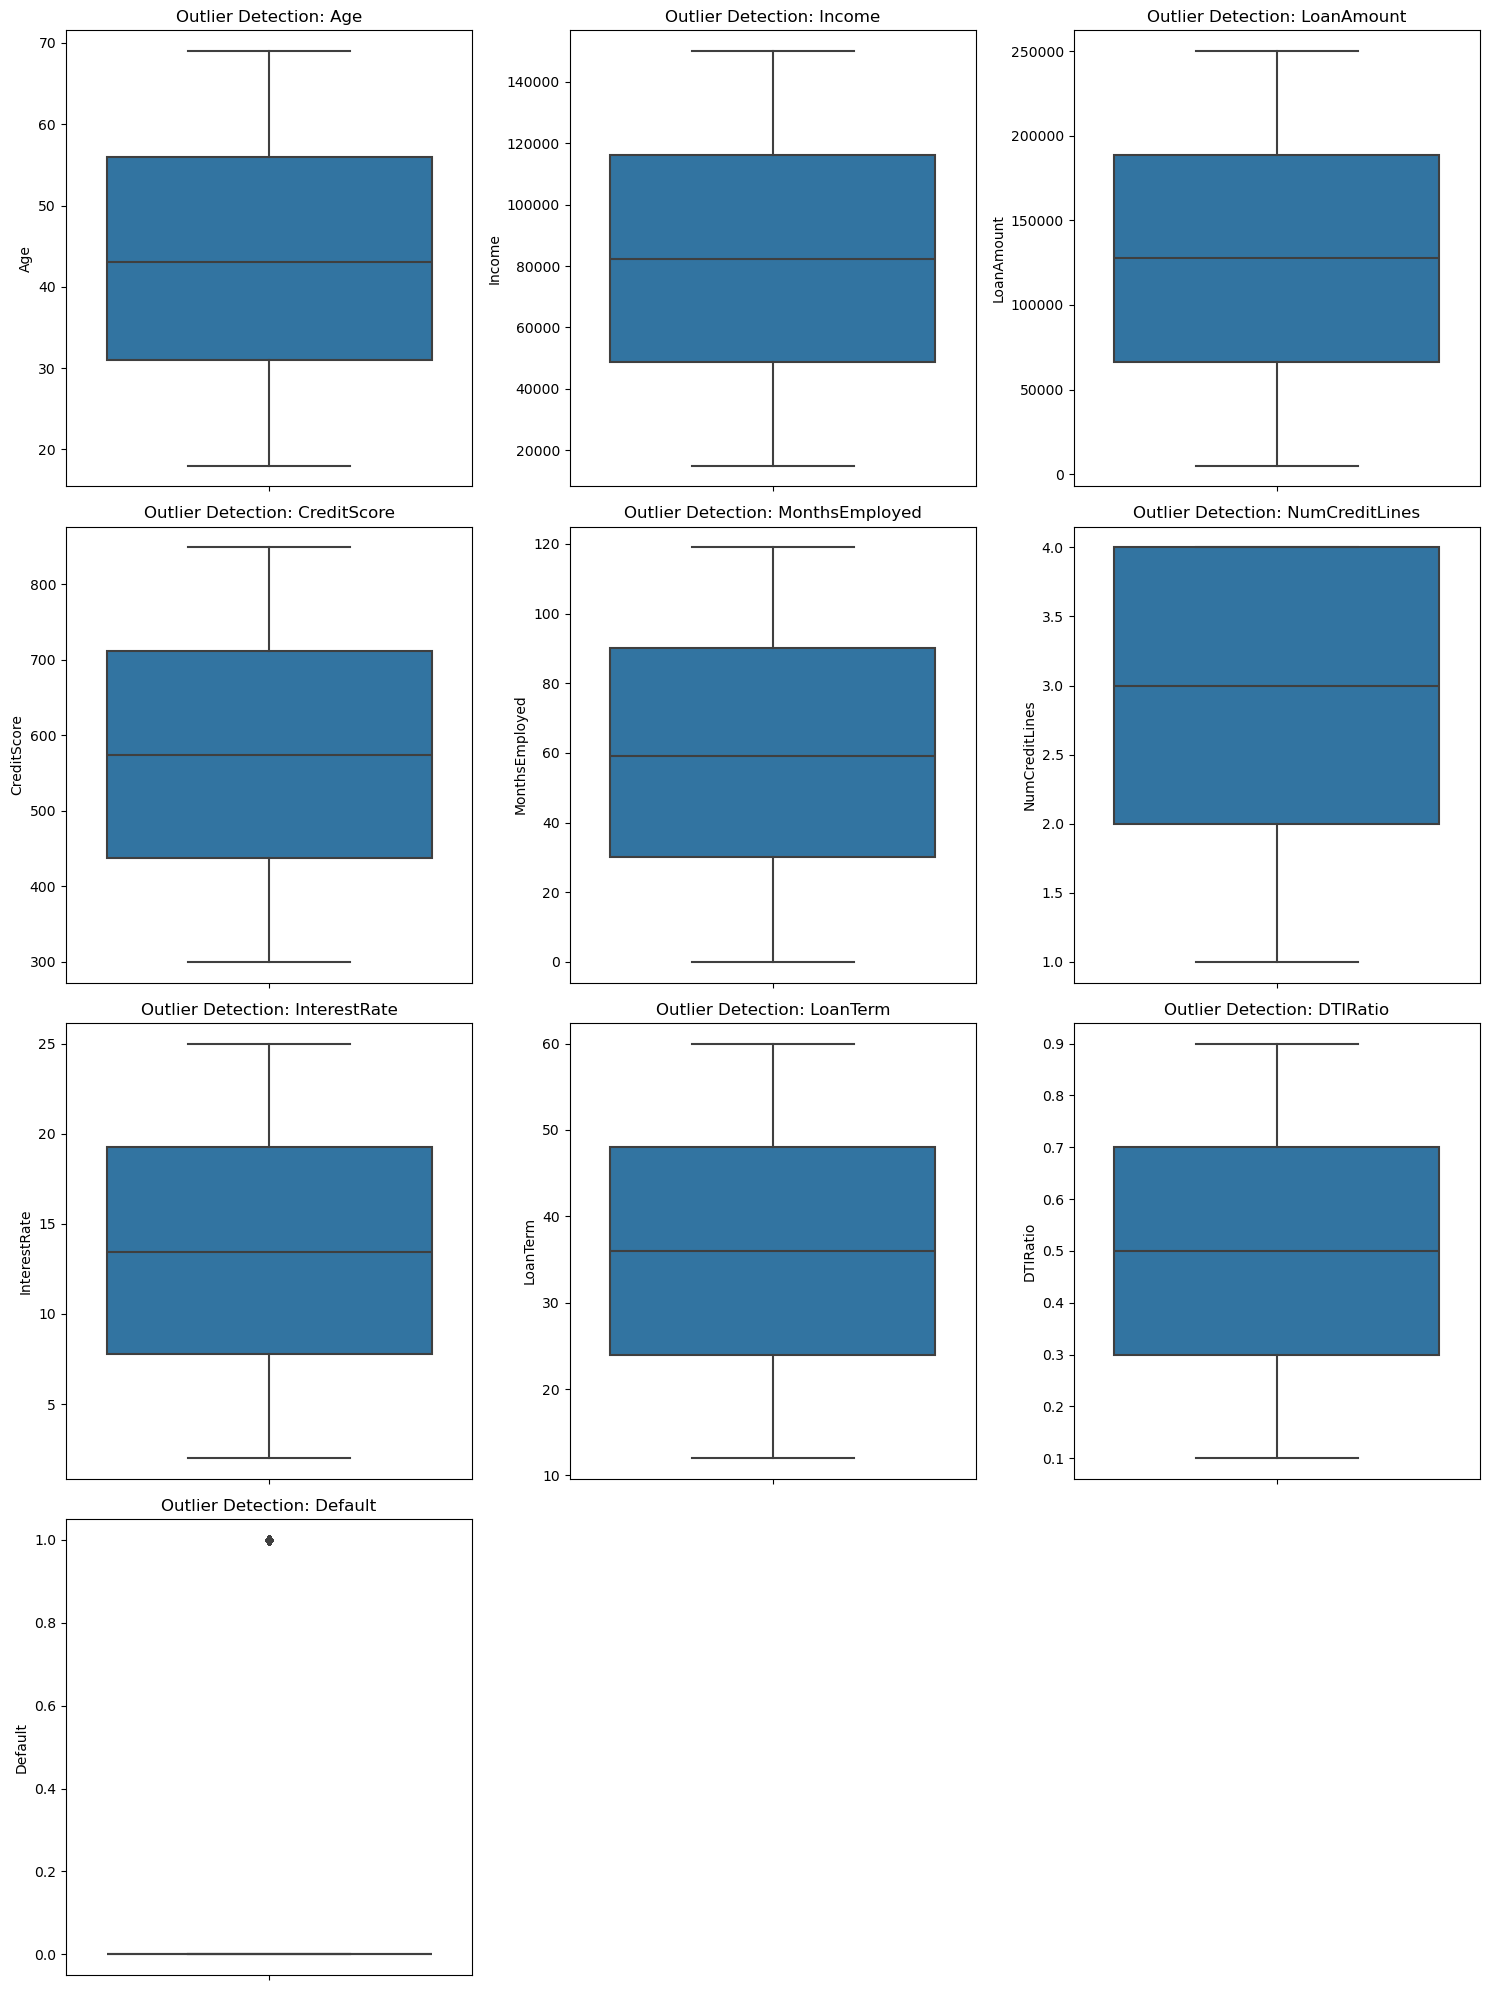

In [19]:
# Step 4: Check for Outliers
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_cols)
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # Adjust rows dynamically for up to 3 columns per row

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f"Outlier Detection: {col}")
plt.tight_layout()
plt.show()


Separate Features and Target

In [20]:
X = data.drop(columns=['LoanID', 'Default'])  # Drop LoanID and target
y = data['Default']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

Preprocess the Data

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

Split Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


Training using Logistic Regression

In [24]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_transformed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
print("\nSaving results for submission...")
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)
loan_ids = test_data['LoanID']

X_test_data = test_data.drop(columns=['LoanID'])
X_test_data_transformed = preprocessor.transform(X_test_data)

final_predictions = lr_model.predict(X_test_data_transformed)
submission = pd.DataFrame({'LoanID': loan_ids, 'Default': final_predictions})
submission.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'.")


Saving results for submission...
Predictions saved to 'submission5.csv'.


Training using Support Vector Machine

In [ ]:
print("\nTraining Support Vector Machine...")
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_transformed, y_train)
svm_predictions = svm_model.predict(X_test_transformed)
print("SVM Results:")
print(classification_report(y_test, svm_predictions))



Training Support Vector Machine...


In [ ]:
print("\nSaving results for submission...")
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)
loan_ids = test_data['LoanID']

X_test_data = test_data.drop(columns=['LoanID'])
X_test_data_transformed = preprocessor.transform(X_test_data)

final_predictions = svm_model.predict(X_test_data_transformed)
submission = pd.DataFrame({'LoanID': loan_ids, 'Default': final_predictions})
submission.to_csv('submission1.csv', index=False)
print("Predictions saved to 'submission1.csv'.")

Training using Neural Network without Skewness Correction

In [ ]:
print("\nTraining Neural Network without SMOTE...")
nn_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train_transformed, y_train)
nn_predictions = nn_model.predict(X_test_transformed)
print("Neural Network Results:")
print(classification_report(y_test, nn_predictions))


In [ ]:
print("\nSaving results for submission...")
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)
loan_ids = test_data['LoanID']

X_test_data = test_data.drop(columns=['LoanID'])
X_test_data_transformed = preprocessor.transform(X_test_data)

final_predictions = nn_model.predict(X_test_data_transformed)
submission = pd.DataFrame({'LoanID': loan_ids, 'Default': final_predictions})
submission.to_csv('submission2.csv', index=False)
print("Predictions saved to 'submission2.csv'.")

Training Neural Network with SMOTE

In [ ]:
print("\nApplying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

print("Training Neural Network with SMOTE...")
nn_smote_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, activation='relu', solver='adam', random_state=42)
nn_smote_model.fit(X_train_balanced, y_train_balanced)
nn_smote_predictions = nn_smote_model.predict(X_test_transformed)
print("Neural Network with SMOTE Results:")
print(classification_report(y_test, nn_smote_predictions))

In [ ]:
print("\nSaving results for submission...")
test_file_path = '/mnt/data/test.csv'
test_data = pd.read_csv(test_file_path)
loan_ids = test_data['LoanID']

X_test_data = test_data.drop(columns=['LoanID'])
X_test_data_transformed = preprocessor.transform(X_test_data)

final_predictions = nn_smote_model.predict(X_test_data_transformed)
submission = pd.DataFrame({'LoanID': loan_ids, 'Default': final_predictions})
submission.to_csv('/mnt/data/submission3.csv', index=False)
print("Predictions saved to 'submission3.csv'.")
